# Exercise 4:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error

## Plot out the raw data

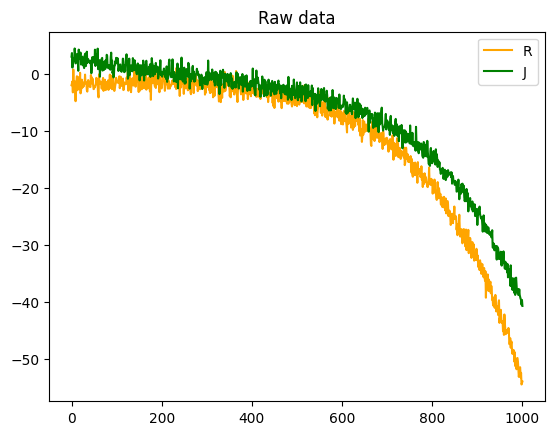

In [13]:
df = pd.read_excel('exact.xlsx')
df.drop(columns = ['Unnamed: 0'], inplace = True)

initial = np.array([[-2.0, 3.0]], dtype = np.float64)
df = df.to_numpy().astype(np.float64)
df = np.concatenate((initial, df), axis = 0)
df = pd.DataFrame(df)
plt.plot(df.iloc[:,0], color = "orange", label = "R")
plt.plot(df.iloc[:,1], color = "green", label = "J")

plt.title("Raw data")
plt.legend()
plt.show()

## Denoise & Remove NA values

In [14]:
rolling = 20
window = 1000
denoise_df = pd.DataFrame()

denoise_df["R"] = df.astype(np.float64).iloc[:,0].rolling(rolling).mean().dropna(axis = 0, how = "all").reset_index(drop = True)
denoise_df["J"] = df.astype(np.float64).iloc[:,1].rolling(rolling).mean().dropna(axis = 0, how = "all").reset_index(drop = True)

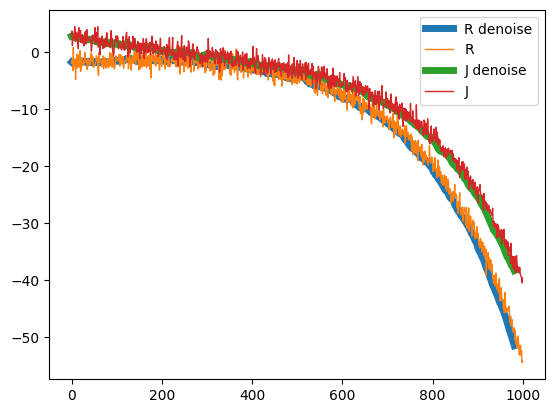

In [15]:
plt.plot(denoise_df["R"], label = "R denoise", linewidth = 5)
plt.plot(df.astype(np.float64).iloc[:window,0], label = "R", linewidth = 1)
plt.plot(denoise_df["J"], label = "J denoise", linewidth=5)
plt.plot(df.astype(np.float64).iloc[:window,1], label = "J", linewidth = 1)
plt.legend()
plt.show()

In [16]:
different = np.mean((denoise_df.to_numpy() - df.astype(np.float64)[rolling-1:]).to_numpy())
print("Mean different = {}".format(different))

Mean different = 0.4456411957092643


## Calculate R' and J'
$$
R'_i = \dfrac{R_{i+1} - R_i}{h}
$$
$$
J'_i = \dfrac{J_{i+1} - J_i}{h}
$$

In [17]:
target = (denoise_df.to_numpy()[1:, :] - denoise_df.to_numpy()[:-1, :])/0.001
data = denoise_df.to_numpy()[:-1, :]

## ElasticNET Regression

ElasticNET is based on linear regression model, but it has ability to handle multicollinearity, a situation where the predictor variables are highly correlated. In such cases, ordinary linear regression may result in unstable and unreliable estimates of the coefficients. However, Elastic Net can handle such situations by shrinking the coefficients of the correlated variables towards each other.

We use 2 ElasticNET regression for R' and J' respectively.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data[:], target[:], test_size = 0.2, random_state = 42)

In [19]:
elastic_reg1 = ElasticNet(alpha = 0.001, l1_ratio = 0.5, max_iter = 10000)
elastic_reg2 = ElasticNet(alpha = 0.001, l1_ratio = 0.5, max_iter = 10000)

elastic_reg1.fit(X_train, y_train[:, 0])
elastic_reg2.fit(X_train, y_train[:, 1])

ElasticNet(alpha=0.001, max_iter=10000)

In [20]:
loss_1 = mean_absolute_error(y_test[:, 0], elastic_reg1.predict(X_test))
loss_2 = mean_absolute_error(y_test[:, 1], elastic_reg2.predict(X_test))
print('Total error = {}'.format((loss_1 + loss_2) / 2))

Total error = 55.52370397348367


In [10]:
a = elastic_reg1.coef_[0]
b = elastic_reg1.coef_[1]
c = elastic_reg2.coef_[0]
d = elastic_reg2.coef_[1]

print("R' = {}R + {}J".format(a, b))
print("J' = {}R + {}J".format(c, d))

R' = -0.13355661837347874R + 6.598761248633914J
J' = 6.882565114529117R + -4.208427499094602J
